<a href="https://colab.research.google.com/github/RTae/CPE213/blob/main/week10/lab/CPE213_Code_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Import dataset

In [44]:
df <- read.csv("./L8-demand.csv", sep=";")

In [45]:
df

Week.of.the.month..first.week..second..third..fourth.or.fifth.week,Day.of.the.week..Monday.to.Friday.,Non.urgent.order,Urgent.order,Order.type.A,Order.type.B,Order.type.C,Fiscal.sector.orders,Orders.from.the.traffic.controller.sector,Banking.orders..1.,Banking.orders..2.,Banking.orders..3.,Target..Total.orders.
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291


# Preporcessing data

In [4]:
cor(df)

,Week.of.the.month..first.week..second..third..fourth.or.fifth.week,Day.of.the.week..Monday.to.Friday.,Non.urgent.order,Urgent.order,Order.type.A,Order.type.B,Order.type.C,Fiscal.sector.orders,Orders.from.the.traffic.controller.sector,Banking.orders..1.,Banking.orders..2.,Banking.orders..3.,Target..Total.orders.
Week.of.the.month..first.week..second..third..fourth.or.fifth.week,1.0000000000,-0.20779136,0.24347184,0.11825817,0.25611518,0.31276651,-0.041581501,0.0009644928,-0.1940876,0.392309707,0.14708608,-0.15705939,0.21170917
Day.of.the.week..Monday.to.Friday.,-0.2077913621,1.00000000,-0.41633080,-0.51710646,-0.06889354,-0.37651221,-0.448823125,-0.1323968395,-0.3394851,-0.051815338,-0.57703533,-0.01225143,-0.43528649
Non.urgent.order,0.2434718350,-0.41633080,1.00000000,0.56479650,0.56139741,0.82718576,0.752627435,-0.0571501771,0.2469369,0.732356705,0.78819200,0.13285748,0.93451783
Urgent.order,0.1182581686,-0.51710646,0.56479650,1.00000000,0.41281707,0.50892879,0.767154718,-0.0114517083,0.2422678,0.230618058,0.66086821,0.03125973,0.72978474
Order.type.A,0.2561151834,-0.06889354,0.56139741,0.41281707,1.00000000,0.43873351,0.218651152,0.0645251249,-0.1517624,0.675327748,0.29437362,0.23036926,0.55973505
Order.type.B,0.3127665142,-0.37651221,0.82718576,0.50892879,0.43873351,1.00000000,0.523597758,-0.1224315524,0.1271113,0.592844716,0.71367402,0.06732478,0.90067287
Order.type.C,-0.0415815015,-0.44882313,0.75262744,0.76715472,0.21865115,0.52359776,1.000000000,0.0079057268,0.4424042,0.330185827,0.71873880,0.03105275,0.80498379
Fiscal.sector.orders,0.0009644928,-0.13239684,-0.05715018,-0.01145171,0.06452512,-0.12243155,0.007905727,1.0000000000,0.1976704,0.003522811,-0.05506611,0.29456725,-0.05211609
Orders.from.the.traffic.controller.sector,-0.1940876154,-0.33948507,0.24693693,0.24226777,-0.15176236,0.12711128,0.442404205,0.1976704001,1.0000000,-0.162309380,0.24044966,0.23161439,0.24471159
Banking.orders..1.,0.3923097073,-0.05181534,0.73235671,0.23061806,0.67532775,0.59284472,0.330185827,0.0035228114,-0.1623094,1.000000000,0.26290454,0.22133454,0.63036504


## Week of the month

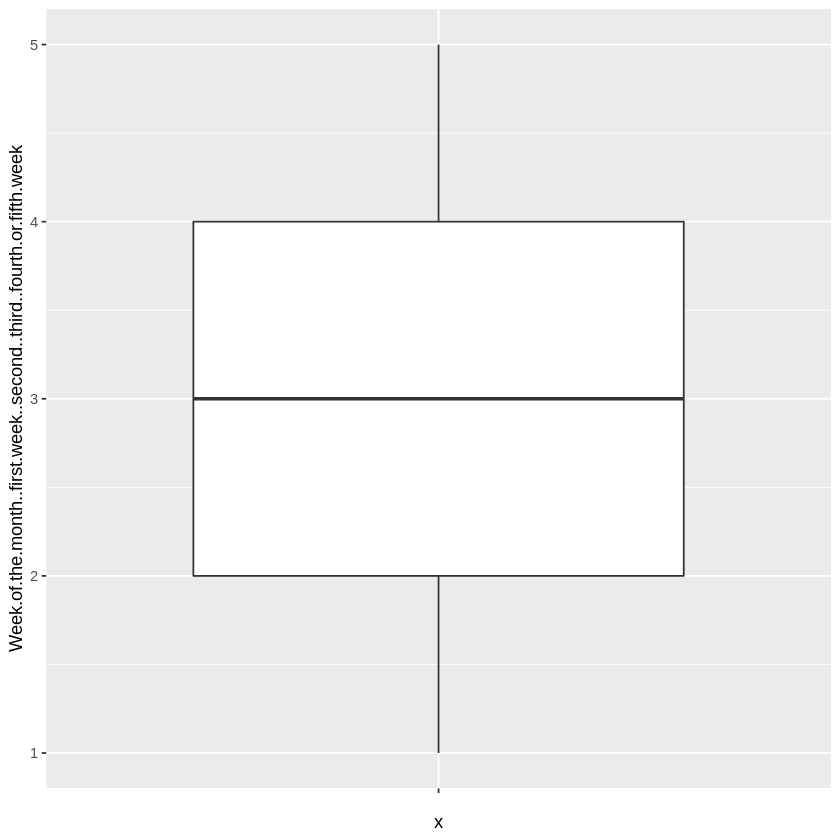

In [ ]:
ggplot(df, aes('',`Week.of.the.month..first.week..second..third..fourth.or.fifth.week`)) + 
  geom_boxplot()

## Day of the week

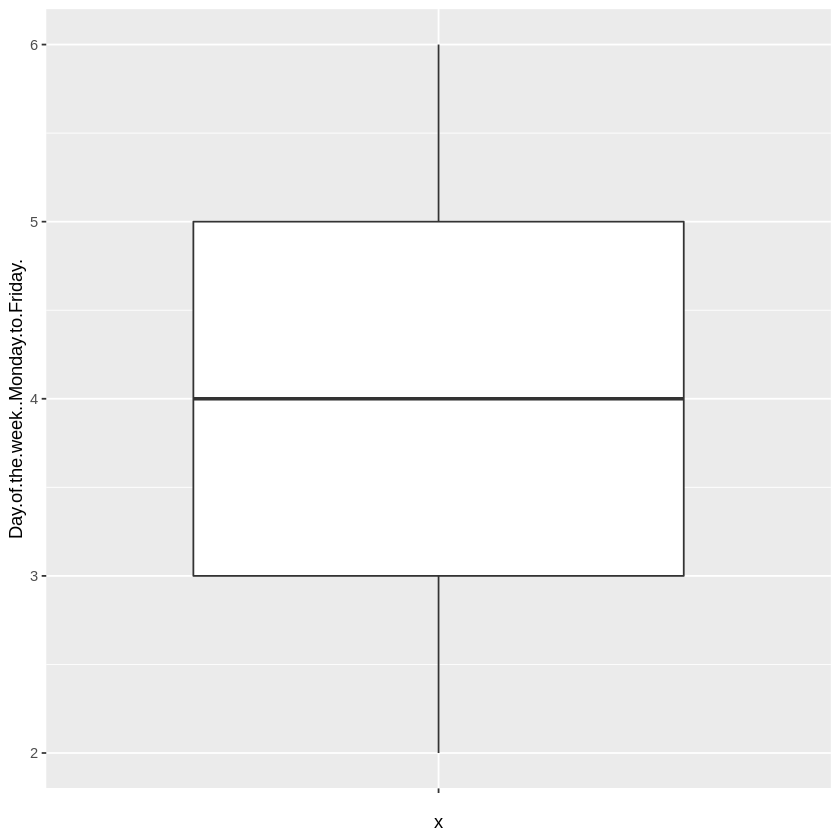

In [ ]:
ggplot(df, aes('',`Day.of.the.week..Monday.to.Friday.`)) + 
  geom_boxplot()

## Non urgent order

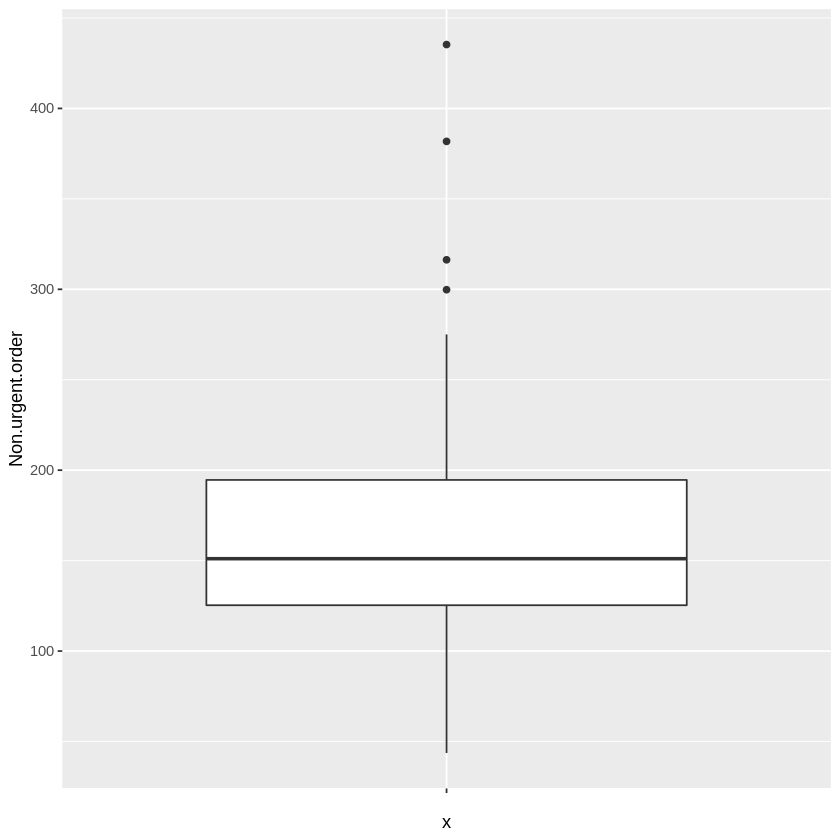

In [ ]:
ggplot(df, aes('',`Non.urgent.order`)) + 
  geom_boxplot()

In [ ]:
non_urgent_order_summary <- df %>%
  summarise(Q1 = quantile(`Non.urgent.order`, 0.25),
            Q3 = quantile(`Non.urgent.order`, 0.75),
            IQR = IQR(`Non.urgent.order`))

lower_non_urgent_order = non_urgent_order_summary$Q1 - 1.5*non_urgent_order_summary$IQR
upper_non_urgent_order = non_urgent_order_summary$Q3 + 1.5*non_urgent_order_summary$IQR

df <- df %>%
  filter((`Non.urgent.order` > lower_non_urgent_order) & (`Non.urgent.order` < upper_non_urgent_order))

## Urgent order

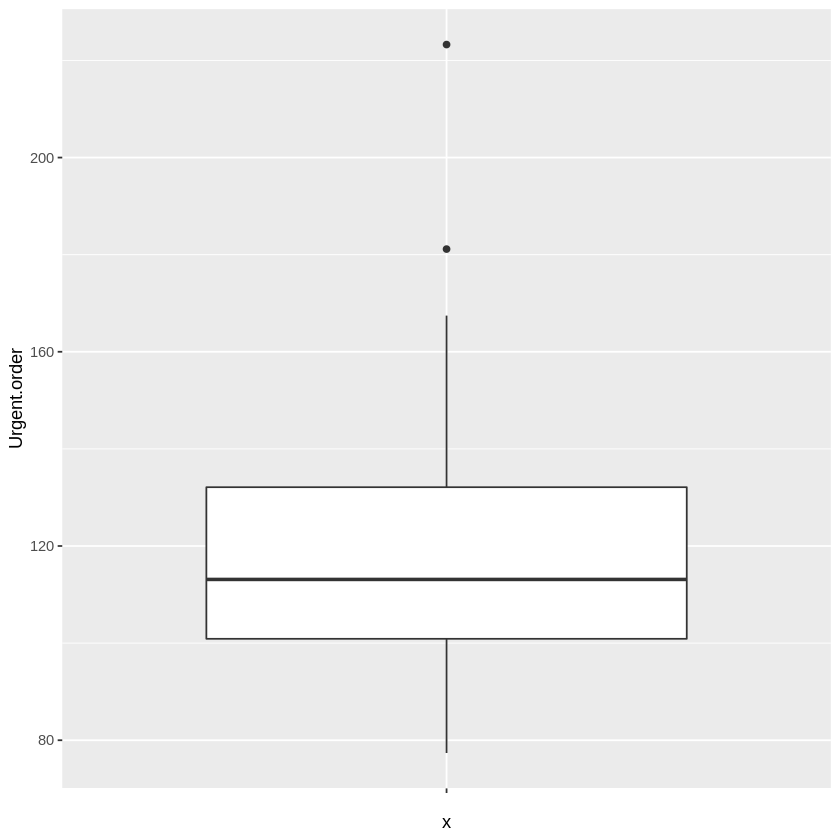

In [ ]:
ggplot(df, aes('',`Urgent.order`)) + 
  geom_boxplot()

In [ ]:
urgent_order_summary <- df %>%
  summarise(Q1 = quantile(`Urgent.order`, 0.25),
            Q3 = quantile(`Urgent.order`, 0.75),
            IQR = IQR(`Urgent.order`))

lower_urgent_order = urgent_order_summary$Q1 - 1.5*urgent_order_summary$IQR
upper_urgent_order = urgent_order_summary$Q3 + 1.5*urgent_order_summary$IQR

df <- df %>%
  filter((`Urgent.order` > lower_urgent_order) & (`Urgent.order` < upper_urgent_order))

## Order type A

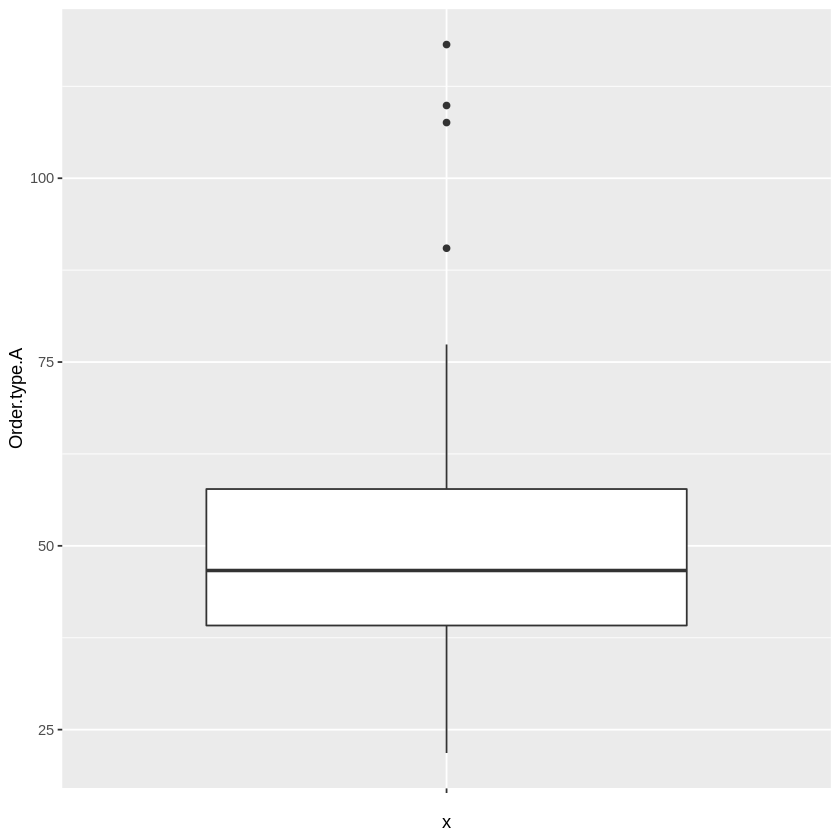

In [ ]:
ggplot(df, aes('',`Order.type.A`)) + 
  geom_boxplot()

In [ ]:
order_type_a_summary <- df %>%
  summarise(Q1 = quantile(`Order.type.A`, 0.25),
            Q3 = quantile(`Order.type.A`, 0.75),
            IQR = IQR(`Order.type.A`))

lower_order_type_a = order_type_a_summary$Q1 - 1.5*order_type_a_summary$IQR
upper_order_type_a = order_type_a_summary$Q3 + 1.5*order_type_a_summary$IQR

df <- df %>%
  filter((`Order.type.A` > lower_order_type_a) & (`Order.type.A` < upper_order_type_a))

## Order type B

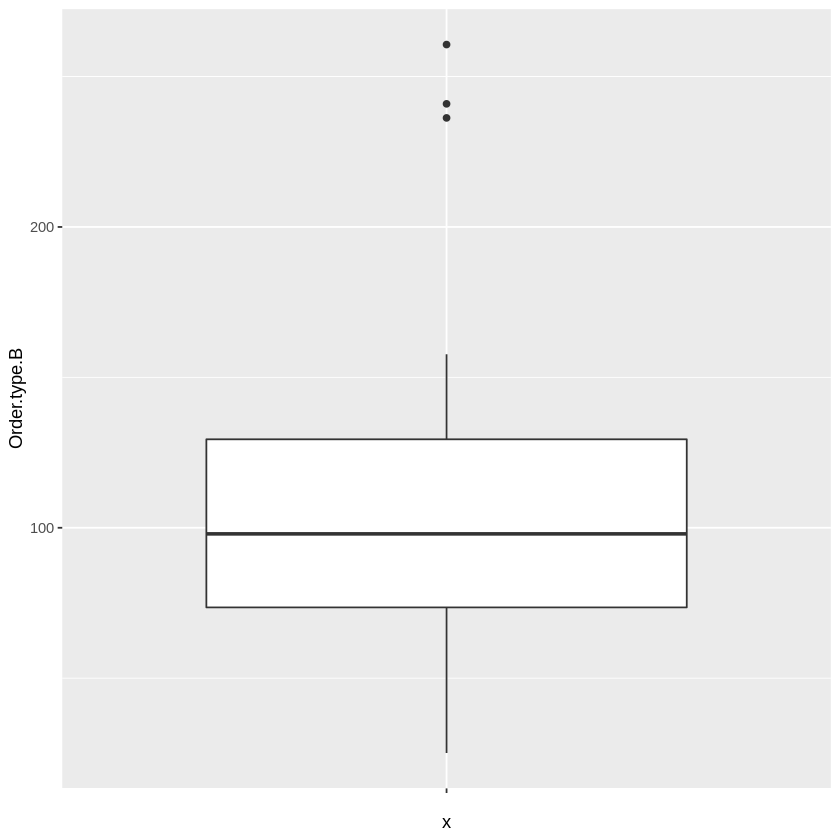

In [ ]:
ggplot(df, aes('',`Order.type.B`)) + 
  geom_boxplot()

In [ ]:
order_type_b_summary <- df %>%
  summarise(Q1 = quantile(`Order.type.B`, 0.25),
            Q3 = quantile(`Order.type.B`, 0.75),
            IQR = IQR(`Order.type.A`))

lower_order_type_b = order_type_b_summary$Q1 - 1.5*order_type_b_summary$IQR
upper_order_type_b = order_type_b_summary$Q3 + 1.5*order_type_b_summary$IQR

df <- df %>%
  filter((`Order.type.B` > lower_order_type_b) & (`Order.type.B` < upper_order_type_b))

## Order type C

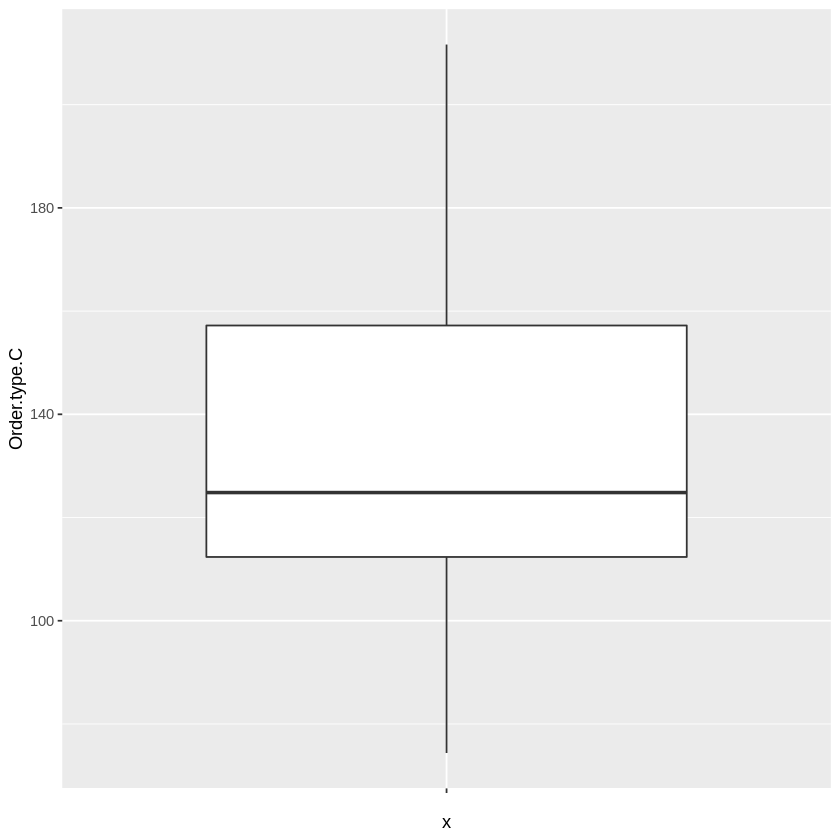

In [ ]:
ggplot(df, aes('',`Order.type.C`)) + 
  geom_boxplot()

## Fiscal sector orders

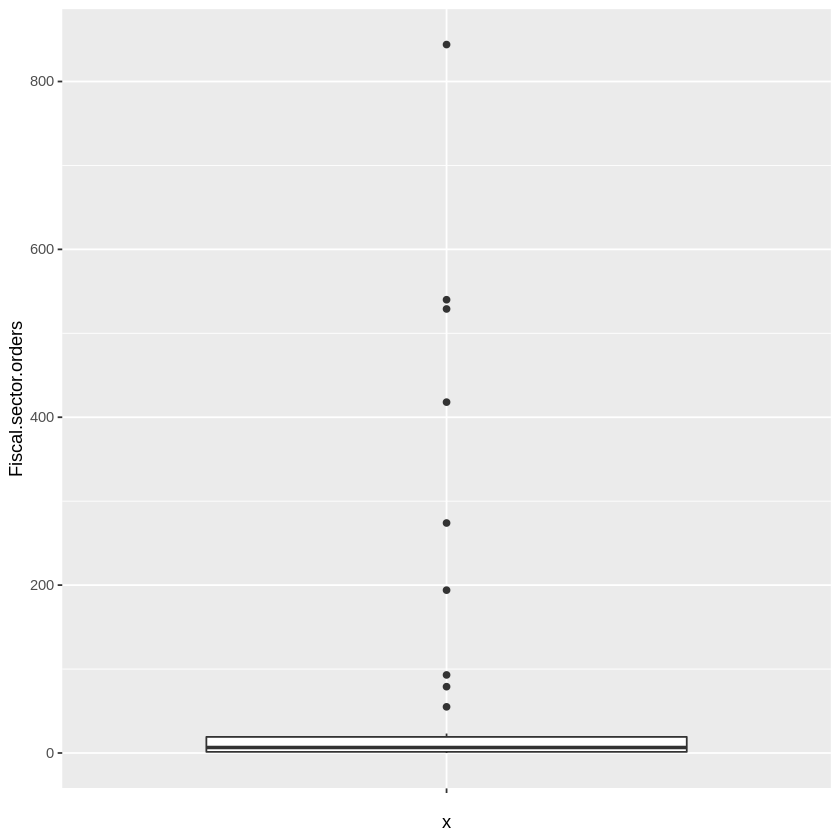

In [ ]:
ggplot(df, aes('',`Fiscal.sector.orders`)) + 
  geom_boxplot()

In [ ]:
final_sector_order_summary <- df %>%
  summarise(Q1 = quantile(`Fiscal.sector.orders`, 0.25),
            Q3 = quantile(`Fiscal.sector.orders`, 0.75),
            IQR = IQR(`Fiscal.sector.orders`))

lower_final_sector_order = final_sector_order_summary$Q1 - 1.5*final_sector_order_summary$IQR
upper_final_sector_order = final_sector_order_summary$Q3 + 1.5*final_sector_order_summary$IQR

df <- df %>%
  filter((`Fiscal.sector.orders` > lower_final_sector_order) & (`Fiscal.sector.orders` < upper_final_sector_order))

## Orders from the traffic controller sector

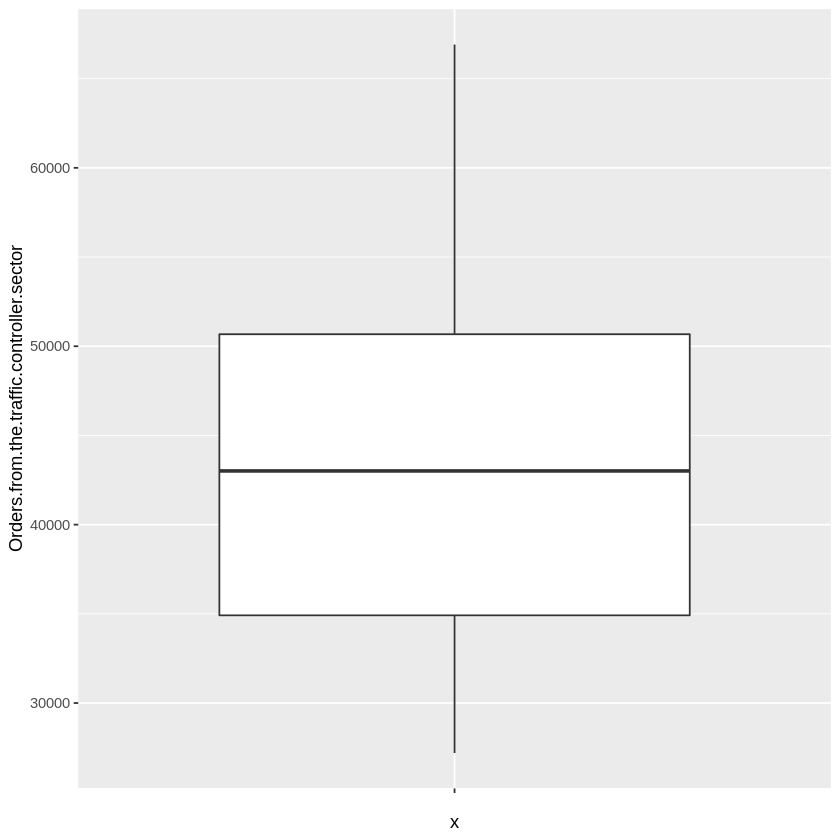

In [ ]:
ggplot(df, aes('',`Orders.from.the.traffic.controller.sector`)) + 
  geom_boxplot()

## Banking orders 1

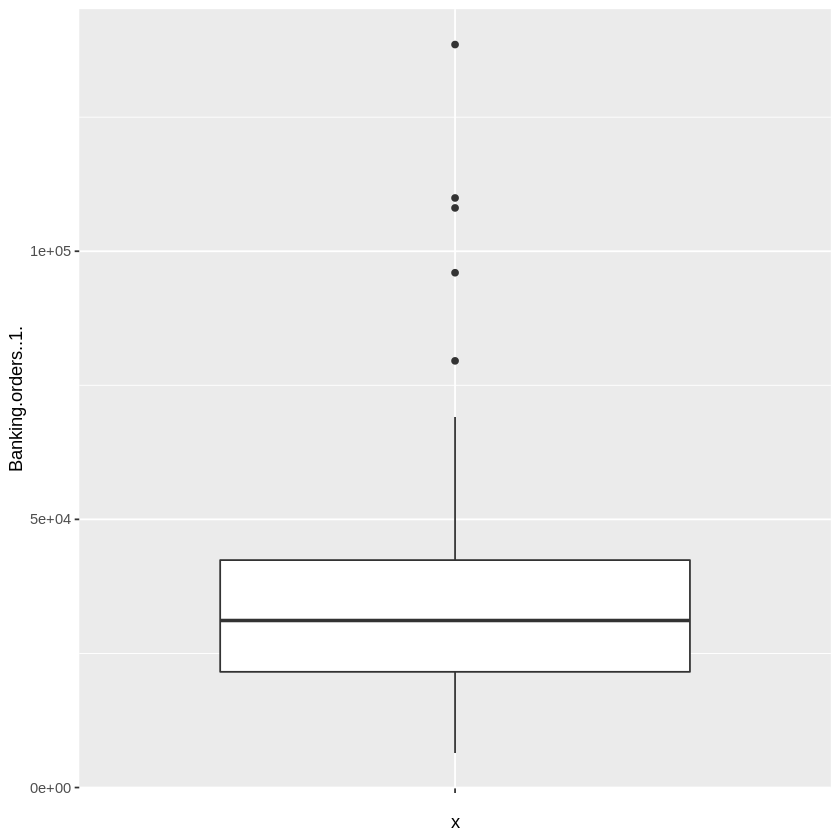

In [ ]:
ggplot(df, aes('',`Banking.orders..1.`)) + 
  geom_boxplot()

In [ ]:
banking_orders_1_summary <- df %>%
  summarise(Q1 = quantile(`Banking.orders..1.`, 0.25),
            Q3 = quantile(`Banking.orders..1.`, 0.75),
            IQR = IQR(`Banking.orders..1.`))

lower_banking_orders_1 = banking_orders_1_summary$Q1 - 1.5*banking_orders_1_summary$IQR
upper_banking_orders_1 = banking_orders_1_summary$Q3 + 1.5*banking_orders_1_summary$IQR

df <- df %>%
  filter((`Banking.orders..1.` > lower_final_sector_order) & (`Banking.orders..1.` < upper_final_sector_order))

## Banking orders 2

In [ ]:
Banking.orders..1.

# Select right feature

In [42]:
cor_mat

,Week.of.the.month..first.week..second..third..fourth.or.fifth.week,Day.of.the.week..Monday.to.Friday.,Non.urgent.order,Urgent.order,Order.type.A,Order.type.B,Order.type.C,Fiscal.sector.orders,Orders.from.the.traffic.controller.sector,Banking.orders..1.,Banking.orders..2.,Banking.orders..3.,Target..Total.orders.
Week.of.the.month..first.week..second..third..fourth.or.fifth.week,1.000000000,-0.205384011,0.31352890,0.24498280,0.2681574,0.35372046,0.02909308,-0.005048019,-0.18305771,0.402903150,0.2206990,-0.187321886,0.301805864
Day.of.the.week..Monday.to.Friday.,-0.205384011,1.000000000,-0.44866896,-0.60507654,-0.0586940,-0.37734208,-0.55911586,-0.139006109,-0.33611746,-0.006577043,-0.6233062,-0.005550498,-0.481510166
Non.urgent.order,0.313528898,-0.448668962,1.00000000,0.41194677,0.5987166,0.78077047,0.64408999,-0.017815112,0.09456408,0.685370280,0.7351562,0.145828392,0.907253271
Urgent.order,0.244982802,-0.605076539,0.41194677,1.00000000,0.4318696,0.40875794,0.62591674,0.041246594,0.07723646,0.121284158,0.5407500,0.063312866,0.624550912
Order.type.A,0.268157425,-0.058694004,0.59871664,0.43186960,1.0000000,0.43012110,0.18646412,0.075117703,-0.20362077,0.714050013,0.2702153,0.231111513,0.602445645
Order.type.B,0.353720459,-0.377342078,0.78077047,0.40875794,0.4301211,1.00000000,0.38032057,-0.101155246,-0.00435737,0.505254779,0.6617451,0.058155012,0.892010948
Order.type.C,0.029093077,-0.559115862,0.64408999,0.62591674,0.1864641,0.38032057,1.00000000,0.085048075,0.32543083,0.180644217,0.6112160,0.056646925,0.698149726
Fiscal.sector.orders,-0.005048019,-0.139006109,-0.01781511,0.04124659,0.0751177,-0.10115525,0.08504808,1.000000000,0.23525631,0.033768265,-0.0204622,0.296758492,-0.008783591
Orders.from.the.traffic.controller.sector,-0.183057713,-0.336117457,0.09456408,0.07723646,-0.2036208,-0.00435737,0.32543083,0.235256311,1.00000000,-0.320504237,0.1061089,0.248612212,0.079290905
Banking.orders..1.,0.402903150,-0.006577043,0.68537028,0.12128416,0.7140500,0.50525478,0.18064422,0.033768265,-0.32050424,1.000000000,0.1436872,0.213258854,0.573524259


In [5]:
cor_mat <- cor(df)
temp_df <- data.frame(cor_mat[, 13])
colnames(temp_df) = c('target')
temp_df %>%
  filter(target > abs(0.6))

,target
,<dbl>
Non.urgent.order,0.9345178
Urgent.order,0.7297847
Order.type.B,0.9006729
Order.type.C,0.8049838
Banking.orders..1.,0.6303650
Banking.orders..2.,0.7984470
Target..Total.orders.,1.0000000


# Scatter plot to see the trend

## Non-urgent order and Total orders

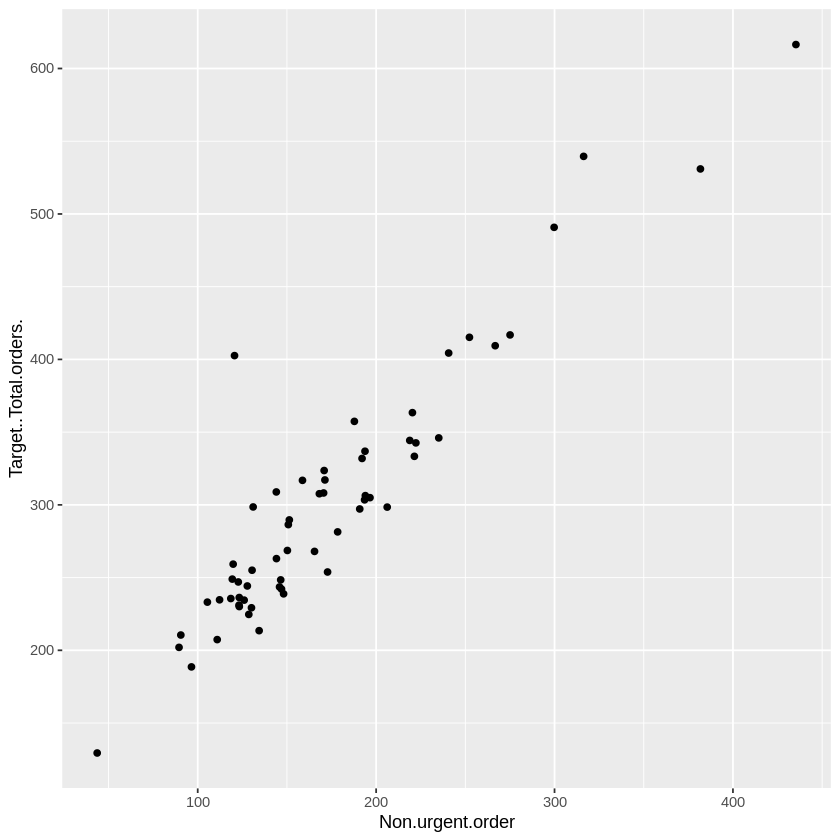

In [6]:
ggplot(df, aes(`Non.urgent.order`, `Target..Total.orders.`)) + 
  geom_point()

## Urgent order and Total orders

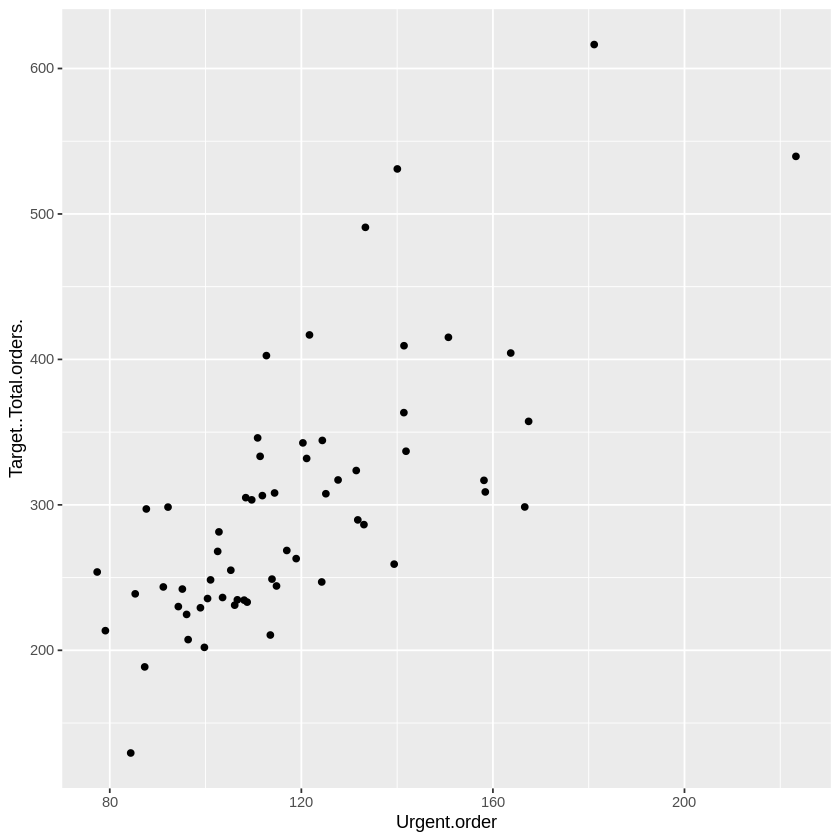

In [7]:
ggplot(df, aes(`Urgent.order`, `Target..Total.orders.`)) + 
  geom_point()

In [8]:
urgent_order_summary <- df %>%
  summarise(Q1 = quantile(`Urgent.order`, 0.25),
            Q3 = quantile(`Urgent.order`, 0.75),
            IQR = IQR(`Urgent.order`))

lower_urgent_order = urgent_order_summary$Q1 - 1.5*urgent_order_summary$IQR
upper_urgent_order = urgent_order_summary$Q3 + 1.5*urgent_order_summary$IQR

df <- df %>%
  filter((`Urgent.order` > lower_urgent_order) & (`Urgent.order` < upper_urgent_order))

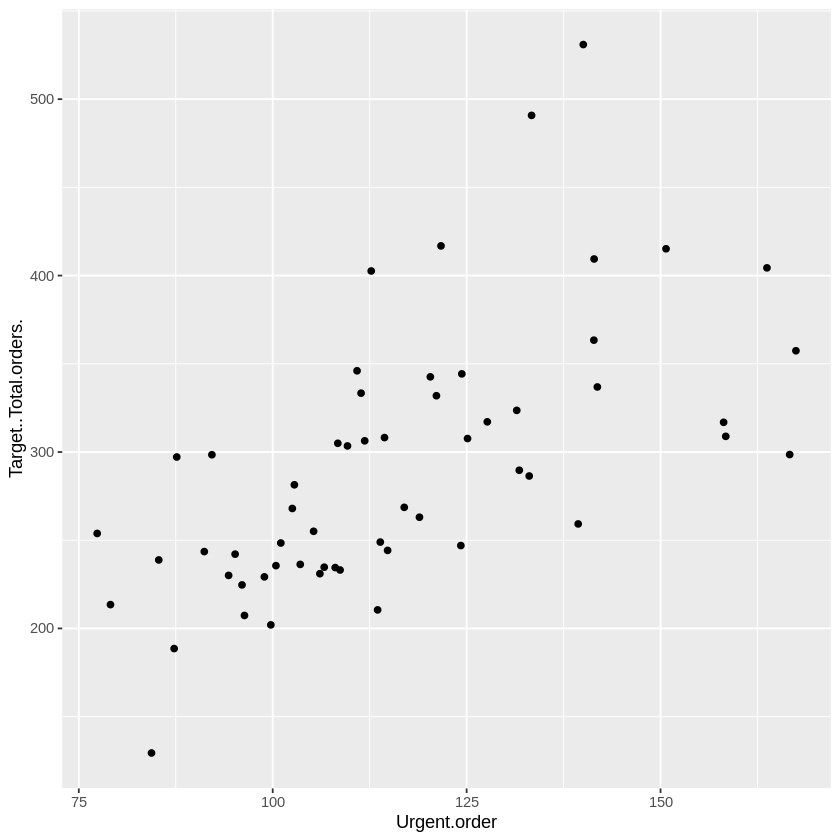

In [9]:
ggplot(df, aes(`Urgent.order`, `Target..Total.orders.`)) + 
  geom_point()

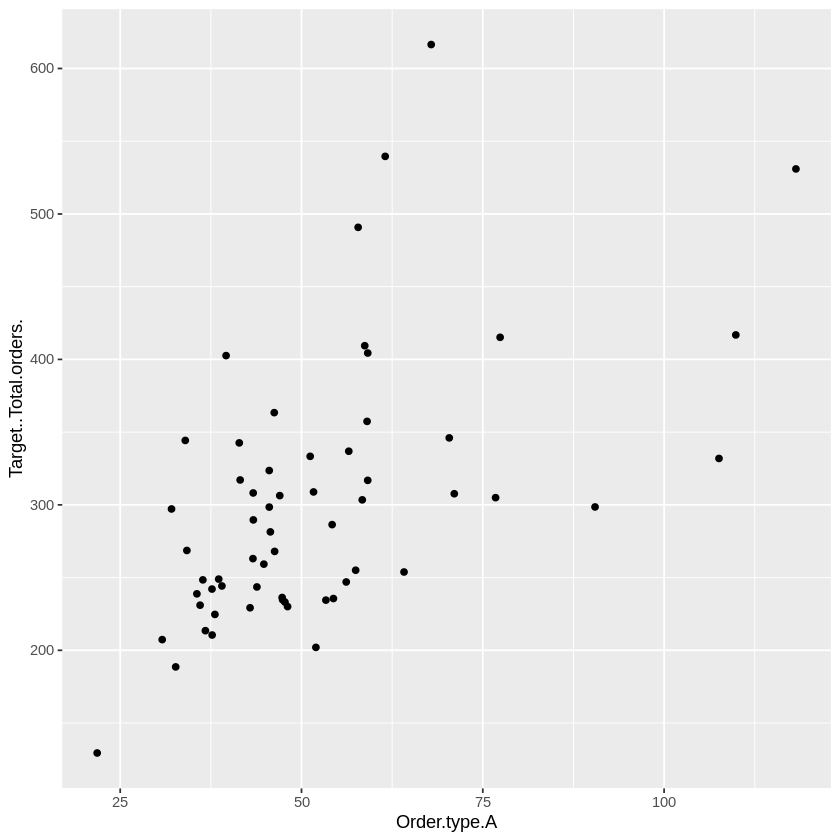

In [46]:
ggplot(df, aes(`Order.type.A`, `Target..Total.orders.`)) + 
  geom_point()

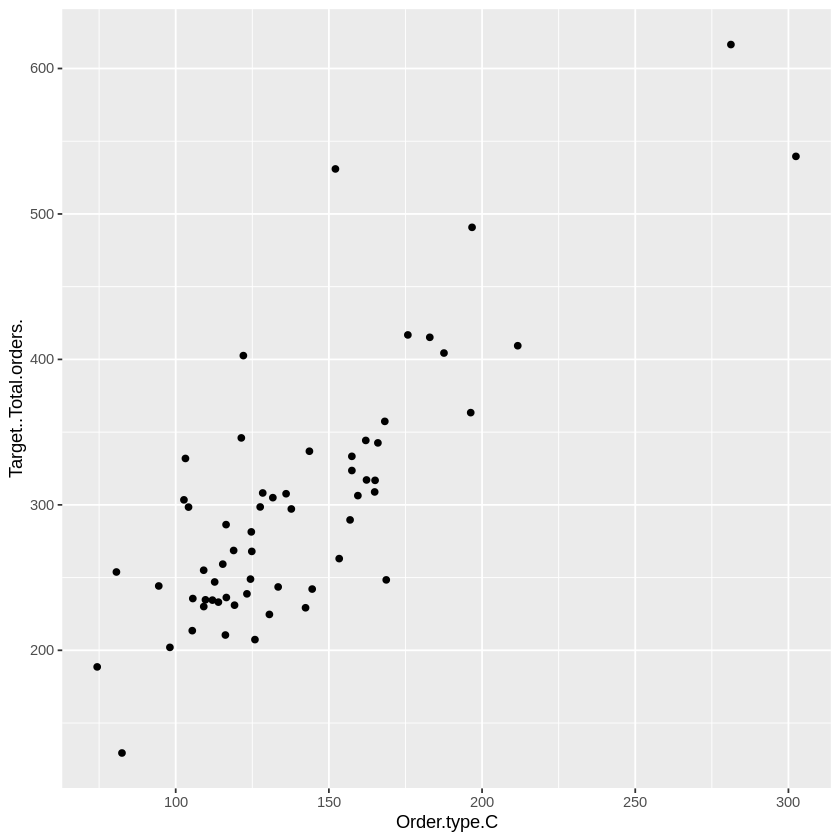

In [47]:
ggplot(df, aes(`Order.type.C`, `Target..Total.orders.`)) + 
  geom_point()

## Order type B vs Total order

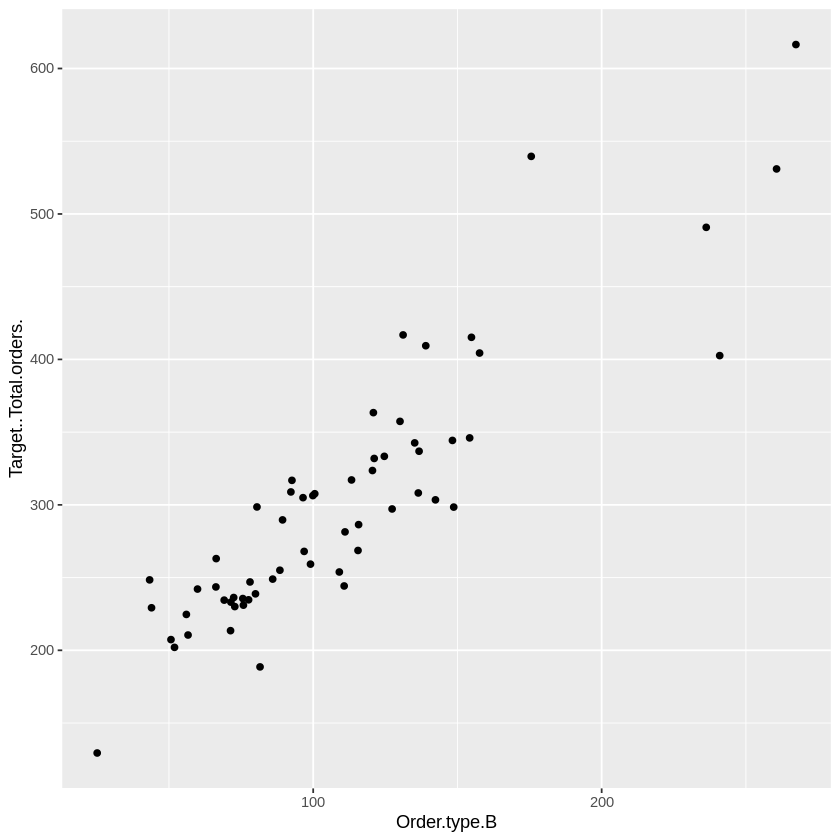

In [48]:
ggplot(df, aes(`Order.type.B`, `Target..Total.orders.`)) + 
  geom_point()

## Order type C vs Total order

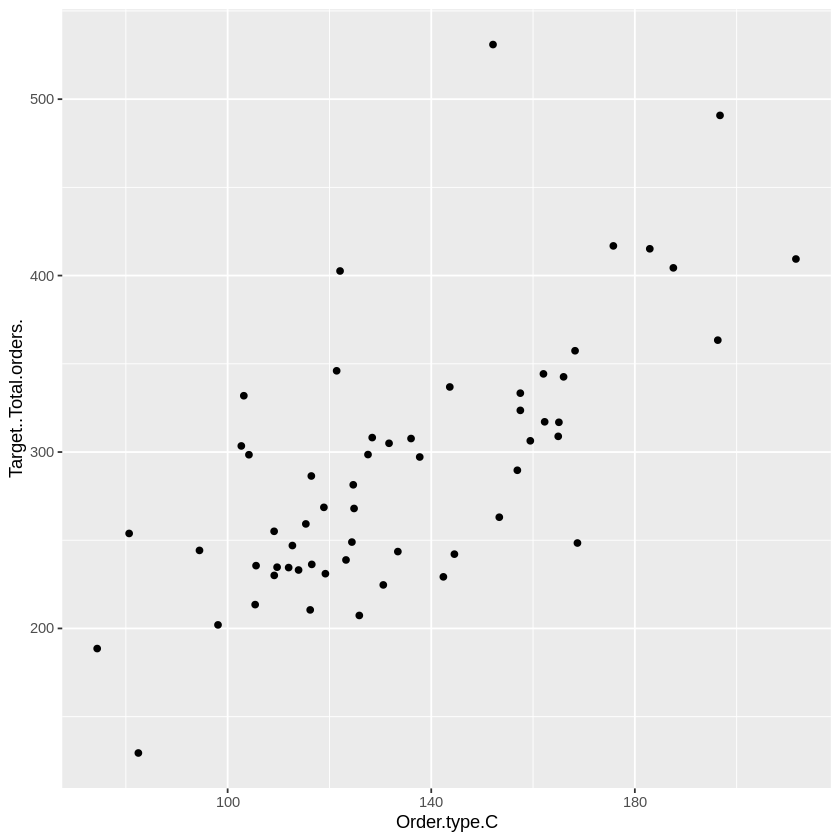

In [11]:
ggplot(df, aes(`Order.type.C`, `Target..Total.orders.`)) + 
  geom_point()

## Banking orders 1	vs Total order

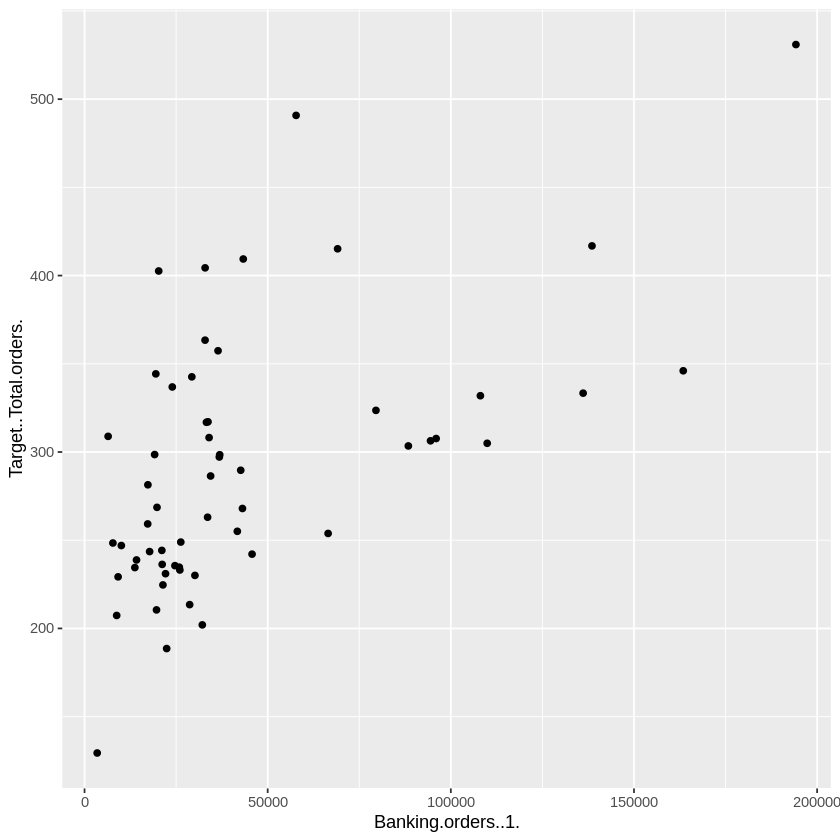

In [12]:
ggplot(df, aes(`Banking.orders..1.`, `Target..Total.orders.`)) + 
  geom_point()

## Banking orders 2	vs Total order

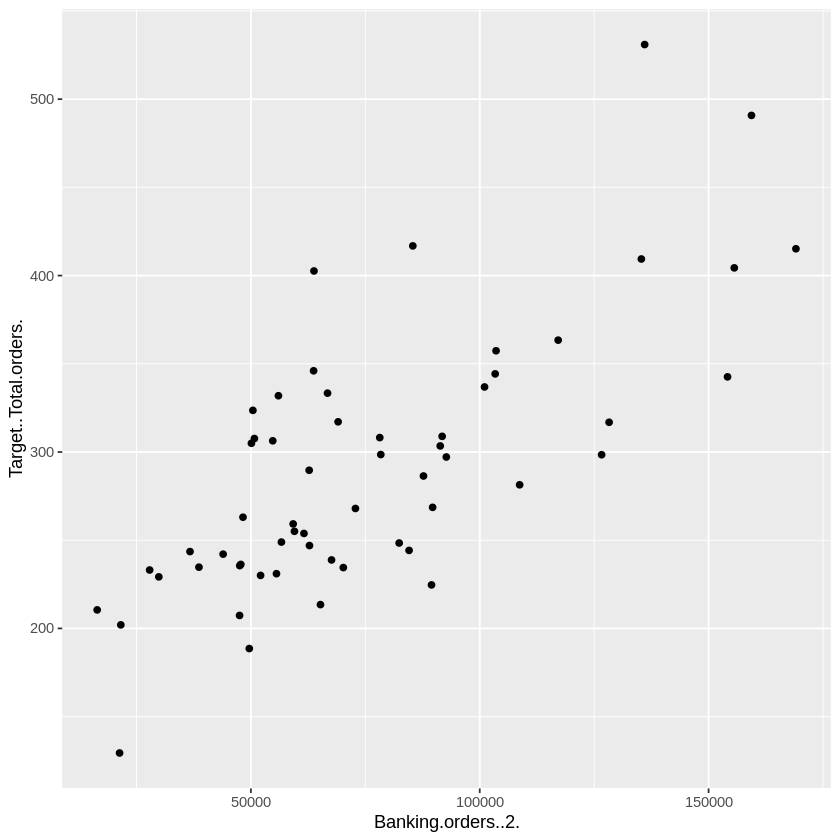

In [13]:
ggplot(df, aes(`Banking.orders..2.`, `Target..Total.orders.`)) + 
  geom_point()

In [14]:
cor_mat <- cor(df)
temp_df <- data.frame(cor_mat[, 13])
colnames(temp_df) = c('target')
temp_df %>%
  filter(target > abs(0.6))

,target
,<dbl>
Non.urgent.order,0.9072533
Urgent.order,0.6245509
Order.type.A,0.6024456
Order.type.B,0.8920109
Order.type.C,0.6981497
Banking.orders..2.,0.7349711
Target..Total.orders.,1.0000000


# Model

In [15]:
colnames(df) = c("weekOfTheMonth", "dayOfTheWeek", "nonUrgentOrder", "urgentOrder", "orderTypeA", "orderTypeB", "orderTypeC", "fiscalSectorOrder", "ordermFromTheTraffucController", "bankingOrder1", "bankingOrder2", "bankingOrder3", "target")

## 1 : target = nonUrgentOrder + orderTypeB + bankingOrder2

In [16]:
model <- lm(target ~ nonUrgentOrder + orderTypeB + bankingOrder2, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder + orderTypeB + bankingOrder2, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.059 -16.555   1.022  15.986  47.306 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.824e+01  9.055e+00  10.849 3.53e-15 ***
nonUrgentOrder 6.440e-01  9.342e-02   6.893 6.14e-09 ***
orderTypeB     7.313e-01  1.063e-01   6.882 6.39e-09 ***
bankingOrder2  1.242e-04  1.251e-04   0.993    0.325    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.65 on 54 degrees of freedom
Multiple R-squared:  0.9111,	Adjusted R-squared:  0.9062 
F-statistic: 184.5 on 3 and 54 DF,  p-value: < 2.2e-16


In [17]:
target_pred = predict(model,df)

In [18]:
sum((target_pred - df$target)^2)

[1] 27711.84

## 2 : target ~ nonUrgentOrder + orderTypeB

In [19]:
model <- lm(target ~ nonUrgentOrder + orderTypeB, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder + orderTypeB, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.459 -14.716  -0.678  15.860  49.657 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    98.18791    9.05360  10.845 2.82e-15 ***
nonUrgentOrder  0.68725    0.08263   8.317 2.66e-11 ***
orderTypeB      0.75321    0.10394   7.246 1.49e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.65 on 55 degrees of freedom
Multiple R-squared:  0.9095,	Adjusted R-squared:  0.9062 
F-statistic: 276.4 on 2 and 55 DF,  p-value: < 2.2e-16


In [20]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 28217.82

## 3 : target ~ nonUrgentOrder

In [21]:
model <- lm(target ~ nonUrgentOrder, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.826 -21.164  -3.519  11.918 163.158 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    100.15420   12.53876   7.988  8.1e-11 ***
nonUrgentOrder   1.15474    0.07153  16.142  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.38 on 56 degrees of freedom
Multiple R-squared:  0.8231,	Adjusted R-squared:  0.8199 
F-statistic: 260.6 on 1 and 56 DF,  p-value: < 2.2e-16


In [22]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 55157.59

## 4: target ~ nonUrgentOrder*bankingOrder2

In [23]:
model <- lm(target ~ nonUrgentOrder*bankingOrder2, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder * bankingOrder2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.750 -18.596  -4.412  12.071 160.687 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.134e+02  2.763e+01   4.103 0.000139 ***
nonUrgentOrder               9.349e-01  1.843e-01   5.073 4.95e-06 ***
bankingOrder2                1.393e-04  3.478e-04   0.401 0.690284    
nonUrgentOrder:bankingOrder2 8.972e-07  1.677e-06   0.535 0.594771    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.96 on 54 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.8248 
F-statistic: 90.47 on 3 and 54 DF,  p-value: < 2.2e-16


In [24]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 51745.83

## 5: target ~ nonUrgentOrder*orderTypeB

In [25]:
model <- lm(target ~ nonUrgentOrder*orderTypeB, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-55.54 -12.78   0.12  15.47  50.04 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               76.2444057 18.3072919   4.165 0.000113 ***
nonUrgentOrder             0.8315600  0.1331385   6.246 6.86e-08 ***
orderTypeB                 0.9105554  0.1540054   5.912 2.35e-07 ***
nonUrgentOrder:orderTypeB -0.0009499  0.0006906  -1.376 0.174652    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.47 on 54 degrees of freedom
Multiple R-squared:  0.9126,	Adjusted R-squared:  0.9077 
F-statistic: 187.9 on 3 and 54 DF,  p-value: < 2.2e-16


In [26]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 27262.6

##6: target ~ nonUrgentOrder*orderTypeB + orderTypeA


In [27]:
model <- lm(target ~ nonUrgentOrder*orderTypeB + bankingOrder2, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB + bankingOrder2, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.295 -11.210   0.157  15.182  48.092 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               78.2054969 18.5286167   4.221 9.58e-05 ***
nonUrgentOrder             0.7836656  0.1462501   5.358 1.86e-06 ***
orderTypeB                 0.8789629  0.1594269   5.513 1.06e-06 ***
bankingOrder2              0.0001012  0.0001258   0.804    0.425    
nonUrgentOrder:orderTypeB -0.0008668  0.0007005  -1.237    0.221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.54 on 53 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.9071 
F-statistic: 140.1 on 4 and 53 DF,  p-value: < 2.2e-16


In [28]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 26933.91

## 7: target ~ nonUrgentOrder*orderTypeB + orderTypeA

In [29]:
model <- lm(target ~ nonUrgentOrder*orderTypeB + orderTypeA, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB + orderTypeA, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.581 -12.529   0.153  16.774  39.158 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               61.4909820 18.1403032   3.390  0.00133 ** 
nonUrgentOrder             0.7519976  0.1292424   5.819 3.52e-07 ***
orderTypeB                 0.9657336  0.1470257   6.568 2.23e-08 ***
orderTypeA                 0.5080484  0.1867807   2.720  0.00881 ** 
nonUrgentOrder:orderTypeB -0.0011624  0.0006577  -1.768  0.08290 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.25 on 53 degrees of freedom
Multiple R-squared:  0.9233,	Adjusted R-squared:  0.9175 
F-statistic: 159.5 on 4 and 53 DF,  p-value: < 2.2e-16


In [30]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 23923.06

## 8: target ~ nonUrgentOrder*orderTypeB + orderTypeA + bankingOrder2

In [31]:
model <- lm(target ~ nonUrgentOrder*orderTypeB + orderTypeA + bankingOrder2, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB + orderTypeA + 
    bankingOrder2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.807 -10.869  -0.455  16.735  36.244 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               62.7729017 17.8072935   3.525 0.000893 ***
nonUrgentOrder             0.6353034  0.1430787   4.440 4.71e-05 ***
orderTypeB                 0.9096574  0.1476886   6.159 1.08e-07 ***
orderTypeA                 0.6066688  0.1915880   3.167 0.002581 ** 
bankingOrder2              0.0002139  0.0001216   1.759 0.084508 .  
nonUrgentOrder:orderTypeB -0.0010278  0.0006496  -1.582 0.119639    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.84 on 52 degrees of freedom
Multiple R-squared:  0.9276,	Adjusted R-squared:  0.9206 
F-statistic: 133.2 on 5 and 52 DF,  p-value: < 2.2e-16


In [32]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 22579.93

## 9: target ~ nonUrgentOrder`*`orderTypeB + orderTypeA`*`bankingOrder2

In [33]:
model <- lm(target ~ nonUrgentOrder*orderTypeB + orderTypeA*bankingOrder2, df)
summary(model)


Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB + orderTypeA * 
    bankingOrder2, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-49.59 -10.34  -0.17  14.11  40.34 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.109e+01  2.003e+01   4.048 0.000176 ***
nonUrgentOrder             8.093e-01  1.686e-01   4.800 1.43e-05 ***
orderTypeB                 1.112e+00  1.811e-01   6.139 1.24e-07 ***
orderTypeA                -2.405e-01  4.953e-01  -0.486 0.629395    
bankingOrder2             -3.701e-04  3.377e-04  -1.096 0.278263    
nonUrgentOrder:orderTypeB -2.300e-03  9.367e-04  -2.456 0.017513 *  
orderTypeA:bankingOrder2   1.085e-05  5.871e-06   1.848 0.070454 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.37 on 51 degrees of freedom
Multiple R-squared:  0.9321,	Adjusted R-squared:  0.9241 
F-statistic: 116.7 on 6 and 51 DF,  p-value: < 2.2e-16


In [34]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 21163.29

##10: target ~ nonUrgentOrder`*`orderTypeB + orderTypeA`*`orderTypeC

In [35]:
model <- lm(target ~ nonUrgentOrder*orderTypeB + orderTypeA*orderTypeC, df)
summary(model)

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB + orderTypeA * 
    orderTypeC, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.363e-14 -1.458e-14 -3.309e-15  7.638e-15  1.391e-13 

Coefficients:
                            Estimate Std. Error    t value Pr(>|t|)    
(Intercept)               -1.129e-13  5.249e-14 -2.151e+00   0.0362 *  
nonUrgentOrder            -1.296e-16  2.292e-16 -5.650e-01   0.5743    
orderTypeB                 1.000e+00  2.053e-16  4.870e+15   <2e-16 ***
orderTypeA                 1.000e+00  1.026e-15  9.751e+14   <2e-16 ***
orderTypeC                 1.000e+00  4.390e-16  2.278e+15   <2e-16 ***
nonUrgentOrder:orderTypeB -1.326e-18  9.823e-19 -1.350e+00   0.1829    
orderTypeA:orderTypeC      2.125e-19  7.360e-18  2.900e-02   0.9771    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.857e-14 on 51 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F

In [36]:
target_pred = predict(model,df)
sum((target_pred - df$target)^2)

[1] 1.56712e-25

# Train test split

In [37]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

In [38]:
model <- lm(target ~ nonUrgentOrder*orderTypeB + orderTypeA*orderTypeC, train)
summary(model)

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = target ~ nonUrgentOrder * orderTypeB + orderTypeA * 
    orderTypeC, data = train)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.748e-13 -9.339e-15  6.000e-15  1.116e-14  5.829e-14 

Coefficients:
                            Estimate Std. Error    t value Pr(>|t|)    
(Intercept)               -1.734e-14  7.737e-14 -2.240e-01    0.824    
nonUrgentOrder             0.000e+00  3.581e-16  0.000e+00    1.000    
orderTypeB                 1.000e+00  2.799e-16  3.573e+15   <2e-16 ***
orderTypeA                 1.000e+00  1.766e-15  5.663e+14   <2e-16 ***
orderTypeC                 1.000e+00  7.465e-16  1.340e+15   <2e-16 ***
nonUrgentOrder:orderTypeB -1.882e-19  1.545e-18 -1.220e-01    0.904    
orderTypeA:orderTypeC      8.072e-18  1.407e-17  5.740e-01    0.570    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.498e-14 on 36 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1

In [41]:
target_pred = predict(model,test)
sum((target_pred - test$target)^2)

[1] 2.665719e-26